# Import Libraries

In [ ]:
import pandas as pd  # Import pandas for working with dataframes
import numpy as np  # Import numpy for numerical operations
from sklearn.model_selection import train_test_split  # Import for splitting data into training and test sets
from sklearn.ensemble import RandomForestClassifier  # Import Random Forest Classifier for model training
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc  # Import evaluation metrics
from sklearn.preprocessing import StandardScaler  # Import StandardScaler for feature normalization
from sklearn.feature_selection import SelectFromModel  # Import SelectFromModel for feature selection based on model importance
import matplotlib.pyplot as plt  # Import matplotlib for creating plots
import seaborn as sns  # Import seaborn for statistical data visualization

# Load the dataset

In [ ]:
# Reading the breast cancer dataset from a CSV file and displaying the first few rows

data = pd.read_csv('breast_cancer.csv')  # Load the dataset from a CSV file
data.head()  # Display the first 5 rows of the dataset

,ID,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


# Explore Dataset

In [ ]:
# Displaying basic information about the dataset, such as column types and missing values

data.info()  # Provides a concise summary of the DataFrame, including the column names, non-null counts, and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  569 non-null    int64  
 1   radius1             569 non-null    float64
 2   texture1            569 non-null    float64
 3   perimeter1          569 non-null    float64
 4   area1               569 non-null    float64
 5   smoothness1         569 non-null    float64
 6   compactness1        569 non-null    float64
 7   concavity1          569 non-null    float64
 8   concave_points1     569 non-null    float64
 9   symmetry1           569 non-null    float64
 10  fractal_dimension1  569 non-null    float64
 11  radius2             569 non-null    float64
 12  texture2            569 non-null    float64
 13  perimeter2          569 non-null    float64
 14  area2               569 non-null    float64
 15  smoothness2         569 non-null    float64
 16  compactn

# Data Preprocessing

In [ ]:
# Checking for missing values
if data.isnull().sum().sum() > 0:
    # Fill missing values with column means
    data.fillna(data.mean(), inplace=True)

# Normalize features

In [ ]:
# Separating features (X) from the target variable (y) and normalizing the features

features = data.drop('Diagnosis', axis=1)  # Drop the 'Diagnosis' column (target variable) to keep only features
scaler = StandardScaler()  # Initialize StandardScaler to normalize the features
normalized_features = scaler.fit_transform(features)  # Normalize the feature values to have mean 0 and standard deviation 1

# Encoding Target Variable

In [ ]:
# Mapping the categorical target variable ('B' and 'M') to numeric values (0 and 1)

data['Diagnosis'] = data['Diagnosis'].map({'B': 0, 'M': 1})  # Convert 'B' to 0 (Benign) and 'M' to 1 (Malignant)

# Splitting data into training and testing sets (80-20 split)

In [ ]:
# Split the normalized features and the target variable into training and testing datasets

X_train, X_test, y_train, y_test = train_test_split(  # Split the data into training and testing sets
    normalized_features, data['Diagnosis'], test_size=0.2, random_state=42  # 80% train, 20% test, with a fixed random seed
)

# Model Training and Evaluation

In [ ]:
# Defining a function to evaluate model performance using various metrics

def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)  # Predict the labels for the test set
    accuracy = accuracy_score(y_test, predictions)  # Calculate accuracy
    precision = precision_score(y_test, predictions, average='weighted')  # Calculate precision with weighted average
    recall = recall_score(y_test, predictions, average='weighted')  # Calculate recall with weighted average
    f1 = f1_score(y_test, predictions, average='weighted')  # Calculate F1-score with weighted average
    return accuracy, precision, recall, f1  # Return all evaluation metrics

## Impact of Number of Trees

In [ ]:
# Training the Random Forest model with varying numbers of trees (n_estimators) and evaluating performance

results = []  # Initialize an empty list to store results
n_trees = [10, 50, 100, 200, 500]  # List of different numbers of trees to test

for n in n_trees:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)  # Initialize RandomForestClassifier with n trees
    rf.fit(X_train, y_train)  # Train the model on the training data
    accuracy, precision, recall, f1 = evaluate_model(rf, X_test, y_test)  # Evaluate the model's performance
    results.append({'n_trees': n, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1})  # Store results
# Convert results to DataFrame for visualization
results_df = pd.DataFrame(results)  # Convert the results list to a pandas DataFrame for easy visualization
results_df  # Display the DataFrame

,n_trees,Accuracy,Precision,Recall,F1-Score
0,10,0.973684,0.974751,0.973684,0.973481
1,50,0.964912,0.965205,0.964912,0.964738
2,100,0.964912,0.965205,0.964912,0.964738
3,200,0.964912,0.965205,0.964912,0.964738
4,500,0.964912,0.965205,0.964912,0.964738


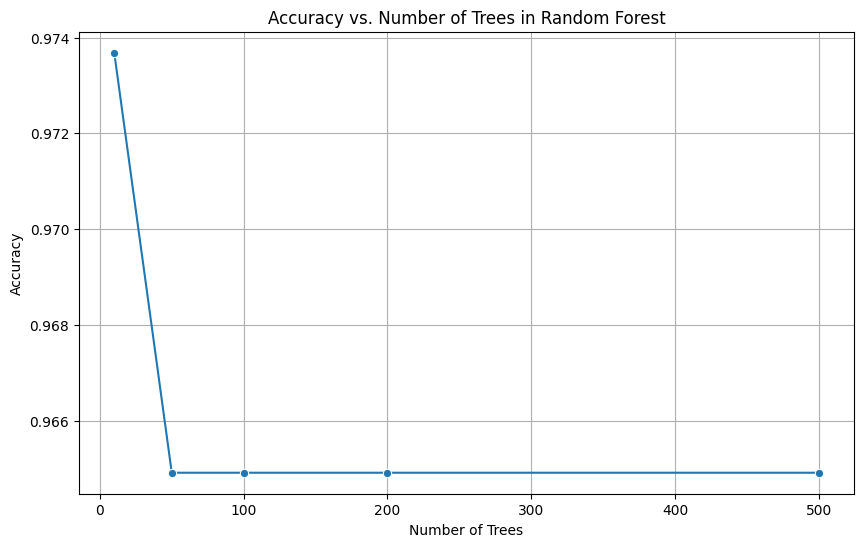

In [ ]:
plt.figure(figsize=(10, 6))  # Set the figure size
sns.lineplot(data=results_df, x='n_trees', y='Accuracy', marker='o')  # Plot a line chart of accuracy vs. number of trees
plt.title('Accuracy vs. Number of Trees in Random Forest')  # Title of the plot
plt.xlabel('Number of Trees')  # X-axis label
plt.ylabel('Accuracy')  # Y-axis label
plt.grid(True)  # Add grid lines to the plot
plt.show()  # Display the plot

## Feature Selection Impact

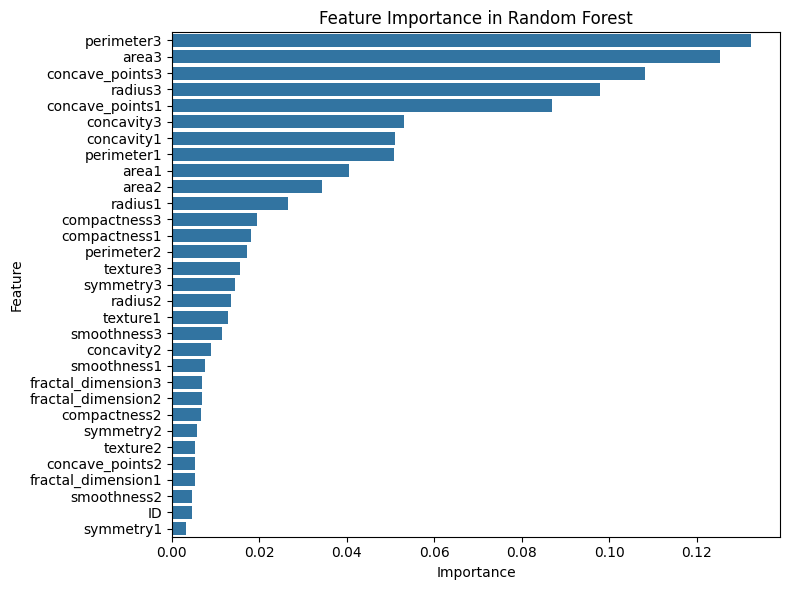

In [ ]:
# Evaluating the impact of feature selection based on the importance of features

# Use feature importance to select relevant features
rf = RandomForestClassifier(n_estimators=100, random_state=42)  # Initialize RandomForestClassifier with 100 trees
rf.fit(X_train, y_train)  # Train the model
feature_importances = rf.feature_importances_  # Get the feature importance scores

# Plot Feature Importance
plt.figure(figsize=(8 ,6))  # Set the figure size for the plot
features_list = data.drop('Diagnosis', axis=1).columns  # List of feature names (excluding 'Diagnosis')
feature_df = pd.DataFrame({'Feature': features_list, 'Importance': feature_importances})  # Create a DataFrame of features and their importances
feature_df = feature_df.sort_values(by='Importance', ascending=False)  # Sort the features by importance

sns.barplot(x='Importance', y='Feature', data=feature_df)  # Plot a horizontal bar chart of feature importance
plt.title('Feature Importance in Random Forest')  # Title of the plot
plt.xlabel('Importance')  # X-axis label
plt.ylabel('Feature')  # Y-axis label
plt.tight_layout()  # Adjust layout to ensure everything fits
plt.show()  # Display the plot

In [ ]:
# Selecting top features based on importance
selector = SelectFromModel(rf, threshold='mean', prefit=True)  # Select features with importance greater than or equal to the mean importance
X_train_selected = selector.transform(X_train)  # Transform the training data to keep only selected features
X_test_selected = selector.transform(X_test)  # Transform the test data to keep only selected features

# Training Random Forest on selected features
rf_selected = RandomForestClassifier(n_estimators=100, random_state=42)  # Initialize RandomForestClassifier with 100 trees
rf_selected.fit(X_train_selected, y_train)  # Train the model on selected features
accuracy_sel, precision_sel, recall_sel, f1_sel = evaluate_model(rf_selected, X_test_selected, y_test)  # Evaluate the performance on selected features

# Display model performance with selected features
print(f"Model Performance using Selected Features:")
print(f"Accuracy: {accuracy_sel:.2f}, Precision: {precision_sel:.2f}, Recall: {recall_sel:.2f}, F1-Score: {f1_sel:.2f}")

Model Performance using Selected Features:
Accuracy: 0.96, Precision: 0.96, Recall: 0.96, F1-Score: 0.96


## ROC Curve

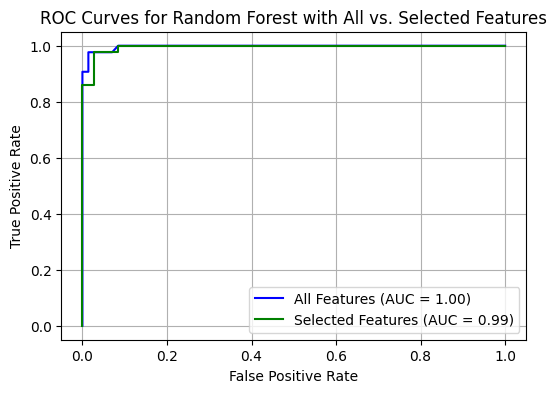

In [ ]:
# Plotting ROC curves for the model with all features and selected features

# ROC Curves
plt.figure(figsize=(6, 4))  # Set the figure size

# ROC for all features
y_pred_prob = rf.predict_proba(X_test)[:, 1]  # Get predicted probabilities for the positive class
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)  # Calculate False Positive Rate and True Positive Rate
roc_auc = auc(fpr, tpr)  # Calculate the Area Under the Curve (AUC)
plt.plot(fpr, tpr, label='All Features (AUC = %0.2f)' % roc_auc, color='blue')  # Plot ROC curve for all features

# ROC for selected features
y_pred_prob_sel = rf_selected.predict_proba(X_test_selected)[:, 1]  # Get predicted probabilities for selected features
fpr_sel, tpr_sel, _ = roc_curve(y_test, y_pred_prob_sel)  # Calculate FPR and TPR for selected features
roc_auc_sel = auc(fpr_sel, tpr_sel)  # Calculate AUC for selected features
plt.plot(fpr_sel, tpr_sel, label='Selected Features (AUC = %0.2f)' % roc_auc_sel, color='green')  # Plot ROC curve for selected features

plt.title('ROC Curves for Random Forest with All vs. Selected Features')  # Set title
plt.xlabel('False Positive Rate')  # X-axis label
plt.ylabel('True Positive Rate')  # Y-axis label
plt.legend(loc='lower right')  # Add a legend
plt.grid(True)  # Add grid lines to the plot
plt.show()  # Display the ROC curve plot